# Week 2 Assignment
## Linear Regression - NLCD Impervious Fractional Cover Prediction (Data Processing)

In this assignment you will prepare the dataset for the regression task of predicting the NLCD impervious fractional cover value (1- 100).

__Raster Files__: 

    - Landsat.tif (remotely sensed data in the form of surface reflactance, will be used as the input to our models) [values (0 - 10000)] numerical
    - Impervious.tif (NLCD fractional impervious map, will be used as our "ground truth" in training some of our modes) [values (0 - 100)] numerical
    - Dem.tif (ancillary data in the form of elevation data) [values (0 - 10000)] numerical
    - Aspect.tif (ancillary data in the form of downslope direction) [values (0 - 8)] categorical
    - Posidex.tif (ancially date in the form of positional index) [values (0 - 100)] numerical
    - Wetlands.tif (ancillary data in the form of wetlands information) [values (0 - 17)] categorical

## 1. Import the required libraries

> As you know by now, you need different libraries to perform various statistical and programming functions. 
> Try to recollect the ones you need, and if you get stuck, you can refer to the instructions document.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

## 2. Read the dataset

In [2]:
df = pd.read_csv('s3://geokarma-testing/geoKARMA_h24v13_pixelbased_dataset.csv')
df

,landsat_1,landsat_2,landsat_3,landsat_4,landsat_5,landsat_6,dem_1,aspect_1,posidex_1,wetlands_1,landcover_1,impervious_1,urban_count_7,urban_count_5,urban_count_3,xgeo,ygeo
0,164,373,233,2592,1096,429,254,2,47,0,42,0,14,2,0,1.051155e+06,1.247055e+06
1,271,418,292,2782,1439,635,257,15,28,0,41,0,17,10,4,1.056225e+06,1.241565e+06
2,454,832,850,3860,2671,1476,277,1,45,-1,81,0,0,0,0,1.128015e+06,1.313925e+06
3,187,345,198,2469,1117,441,242,8,27,-1,42,0,0,0,0,1.124175e+06,1.282395e+06
4,481,715,731,3519,2286,1386,239,1,91,0,21,13,16,11,5,1.156905e+06,1.320645e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,257,504,474,2794,1555,733,340,12,38,0,21,16,35,18,7,1.065225e+06,1.290975e+06
499996,202,386,207,3367,1275,476,325,10,47,0,42,0,0,0,0,1.074765e+06,1.298895e+06
499997,158,352,210,3074,1433,500,258,16,54,0,41,0,3,0,0,1.043805e+06,1.245045e+06
499998,143,378,233,3098,1217,503,274,9,-1,0,21,1,34,18,6,1.055205e+06,1.231785e+06


## 3. Get basic information about the dataset

#### 3a. Print dimensions of the dataset

In [3]:
df.shape

(500000, 17)

#### 3b. Print the column names

In [4]:
df.columns

Index(['landsat_1', 'landsat_2', 'landsat_3', 'landsat_4', 'landsat_5',
       'landsat_6', 'dem_1', 'aspect_1', 'posidex_1', 'wetlands_1',
       'landcover_1', 'impervious_1', 'urban_count_7', 'urban_count_5',
       'urban_count_3', 'xgeo', 'ygeo'],
      dtype='object')

#### 3c. Print the first five observations

In [5]:
df.head()

,landsat_1,landsat_2,landsat_3,landsat_4,landsat_5,landsat_6,dem_1,aspect_1,posidex_1,wetlands_1,landcover_1,impervious_1,urban_count_7,urban_count_5,urban_count_3,xgeo,ygeo
0,164,373,233,2592,1096,429,254,2,47,0,42,0,14,2,0,1.051155e+06,1.247055e+06
1,271,418,292,2782,1439,635,257,15,28,0,41,0,17,10,4,1.056225e+06,1.241565e+06
2,454,832,850,3860,2671,1476,277,1,45,-1,81,0,0,0,0,1.128015e+06,1.313925e+06
3,187,345,198,2469,1117,441,242,8,27,-1,42,0,0,0,0,1.124175e+06,1.282395e+06
4,481,715,731,3519,2286,1386,239,1,91,0,21,13,16,11,5,1.156905e+06,1.320645e+06


## 4. Data Preparation

#### 4a. Create a 'subset' of the dataframe where 'impervious_1' > 0 and 'impervious_1' <= 100

>Hint: pd.DataFrame.loc[condition]

In [27]:
subset = df.loc[(df['impervious_1'] > 0) & (df['impervious_1'] <= 100)] 
subset

,landsat_1,landsat_2,landsat_3,landsat_4,landsat_5,landsat_6,dem_1,aspect_1,posidex_1,wetlands_1,landcover_1,impervious_1,urban_count_7,urban_count_5,urban_count_3,xgeo,ygeo
4,481,715,731,3519,2286,1386,239,1,91,0,21,13,16,11,5,1.156905e+06,1.320645e+06
7,164,375,295,2513,1327,620,156,5,78,0,21,16,9,8,5,1.144875e+06,1.214895e+06
10,2576,2853,3093,3513,2932,1979,314,6,44,0,24,83,49,25,9,1.101075e+06,1.283385e+06
11,295,510,412,3151,1564,884,369,255,84,0,21,4,23,13,6,1.084035e+06,1.313055e+06
15,197,459,278,3481,1696,760,236,11,40,0,21,2,17,10,6,1.123845e+06,1.294245e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499975,254,399,234,2669,1128,481,243,14,23,0,21,12,49,25,9,1.063605e+06,1.258995e+06
499978,327,491,339,3648,1700,723,324,4,72,0,21,16,48,25,9,1.079985e+06,1.261305e+06
499981,349,489,390,3436,1643,870,249,10,43,0,22,20,18,11,6,1.139805e+06,1.314195e+06
499995,257,504,474,2794,1555,733,340,12,38,0,21,16,35,18,7,1.065225e+06,1.290975e+06


#### 4b. Check to make sure the above worked by printing all unique values in subset['impervious_1']

In [28]:
subset['impervious_1'].unique()

array([ 13,  16,  83,   4,   2,  44,  71,  32,  39,   1,  58,  55,   6,
        82,  29,  30,  52,  41,  15,  74,  24,  25,  75,   8,  26,   7,
        31,  28,  95,  45,  37,  19,  21,  22,  85,  35,  10,   3,  18,
       100,  90,  43,  57,  56,  38,  81,  60,  59,  92,  20,  33,  53,
        17,  67,   5,  87,  11,  54,  78,  14,  86,  23,  47,  65,  46,
         9,  77,  48,  36,  99,  73,  61,  69,  34,  42,  88,  12,  91,
        27,  80,  76,  40,  63,  64,  66,  50,  51,  93,  84,  89,  79,
        68,  94,  70,  96,  49,  62,  72,  98,  97])

#### 4c. Print the subset stats 
>Hint describe()

In [29]:
subset.describe()

,landsat_1,landsat_2,landsat_3,landsat_4,landsat_5,landsat_6,dem_1,aspect_1,posidex_1,wetlands_1,landcover_1,impervious_1,urban_count_7,urban_count_5,urban_count_3,xgeo,ygeo
count,131382.000000,131382.000000,131382.000000,131382.000000,131382.000000,131382.000000,131382.000000,131382.000000,131382.000000,131382.000000,131382.000000,131382.000000,131382.000000,131382.000000,131382.000000,1.313820e+05,1.313820e+05
mean,456.255416,719.880897,676.013739,2913.920743,1947.936993,1122.041246,-213.383980,20.599237,51.480431,-0.028870,24.243747,30.165593,34.571715,18.631388,7.290542,1.090321e+06,1.278738e+06
std,413.560737,479.496319,570.384322,615.031462,634.241868,532.596489,2236.576935,53.607109,23.551807,0.328452,14.513330,26.741413,13.449433,6.544337,2.102035,3.663258e+04,3.561413e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9999.000000,0.000000,-1.000000,-1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.034415e+06,1.214835e+06
25%,261.000000,474.000000,359.000000,2542.000000,1505.000000,732.000000,252.000000,5.000000,37.000000,0.000000,21.000000,7.000000,24.000000,14.000000,6.000000,1.061985e+06,1.251675e+06
50%,365.000000,619.000000,547.000000,2902.000000,1845.000000,1023.000000,288.000000,9.000000,53.000000,0.000000,22.000000,23.000000,38.000000,21.000000,8.000000,1.083645e+06,1.276935e+06
75%,511.000000,805.000000,800.000000,3267.000000,2273.000000,1391.000000,320.000000,13.000000,68.000000,0.000000,23.000000,47.000000,47.000000,25.000000,9.000000,1.110795e+06,1.299765e+06
max,6303.000000,7262.000000,7653.000000,8044.000000,7855.000000,8327.000000,1178.000000,255.000000,100.000000,8.000000,99.000000,100.000000,49.000000,25.000000,9.000000,1.184385e+06,1.364805e+06


#### 4d. Drop all rows with invalid Landsat data (refer to no-data value given by raster)
>There are several ways to handle this, median value imputation, mean value imputation, etc.. for now we are just going to drop those observations

> Also reset the index of the subset after you drop rows

>__HINT__: subset = subset.reset_index(drop=True)

In [37]:
# drop all rows with invalid landsat data (where any of the bands have a no-data value)
subset = subset.loc[(
    (subset['landsat_1'] != 0) &
    (subset['landsat_2'] != 0) &
    (subset['landsat_3'] != 0) &
    (subset['landsat_4'] != 0) &
    (subset['landsat_5'] != 0) &
    (subset['landsat_6'] != 0))]
subset = subset.reset_index()

#### 4e. Print min(), max() value of dem_1 and all unique values of the 2 categorical features
>Hint: refer to the assignment introduction for which features are categorical

The purpose of this is to see if any of the values present in the subset are not part of each features set of valid values. If we find invalid values, we will take a look at the feature distributions to determine a method for replacing or removing those values.

In [31]:
dem_1 = subset['dem_1']
print('min = ', dem_1.min())
print('max = ', dem_1.max())
aspect = subset['aspect_1'].unique()
wetlands = subset['wetlands_1'].unique()
print(aspect, wetlands)

min =  -9999
max =  1178
[  1   5   6 255  11   8  12  15   0  14   7   3   9   4  10   2  13  17
  16] [ 0 -1  2  3  5  8  4  7  6]


#### 4f. Plot a barplot of "dem_1", "wetlands_1", "aspect_1" to check frequency of values in the variable

> __HINT__: You can check the assignment instructions for the code

In [38]:
subset

,index,landsat_1,landsat_2,landsat_3,landsat_4,landsat_5,landsat_6,dem_1,aspect_1,posidex_1,wetlands_1,landcover_1,impervious_1,urban_count_7,urban_count_5,urban_count_3,xgeo,ygeo
0,0,481,715,731,3519,2286,1386,239,1,91,0,21,13,16,11,5,1.156905e+06,1.320645e+06
1,1,164,375,295,2513,1327,620,156,5,78,0,21,16,9,8,5,1.144875e+06,1.214895e+06
2,2,2576,2853,3093,3513,2932,1979,314,6,44,0,24,83,49,25,9,1.101075e+06,1.283385e+06
3,3,295,510,412,3151,1564,884,369,255,84,0,21,4,23,13,6,1.084035e+06,1.313055e+06
4,4,197,459,278,3481,1696,760,236,11,40,0,21,2,17,10,6,1.123845e+06,1.294245e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131302,131302,254,399,234,2669,1128,481,243,14,23,0,21,12,49,25,9,1.063605e+06,1.258995e+06
131303,131303,327,491,339,3648,1700,723,324,4,72,0,21,16,48,25,9,1.079985e+06,1.261305e+06
131304,131304,349,489,390,3436,1643,870,249,10,43,0,22,20,18,11,6,1.139805e+06,1.314195e+06
131305,131305,257,504,474,2794,1555,733,340,12,38,0,21,16,35,18,7,1.065225e+06,1.290975e+06


<Axes: xlabel='dem_1'>

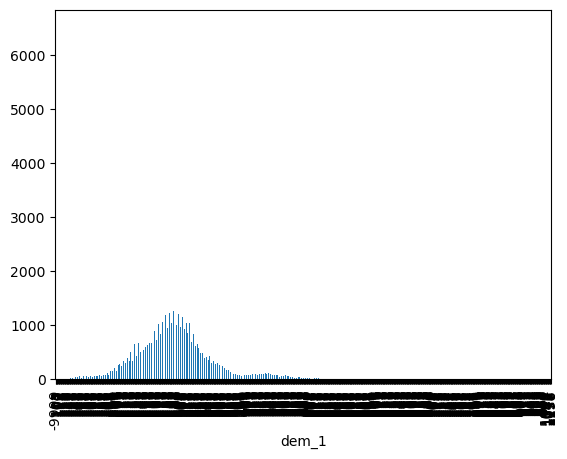

In [40]:
subset['dem_1'].value_counts()[subset['dem_1'].unique()].sort_index().plot.bar(y='dem_1')

<Axes: xlabel='aspect_1'>

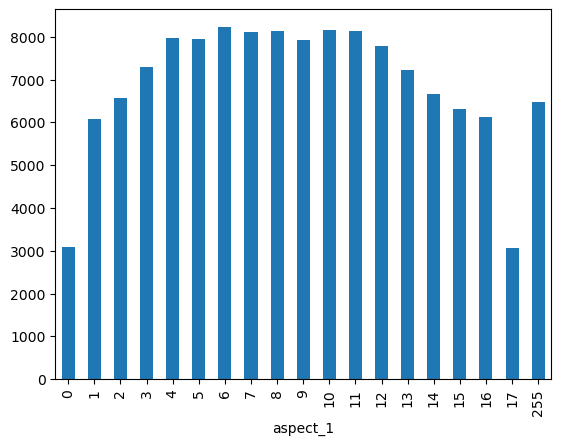

In [41]:
subset['aspect_1'].value_counts()[subset['aspect_1'].unique()].sort_index().plot.bar(y='aspect_1')

<Axes: xlabel='wetlands_1'>

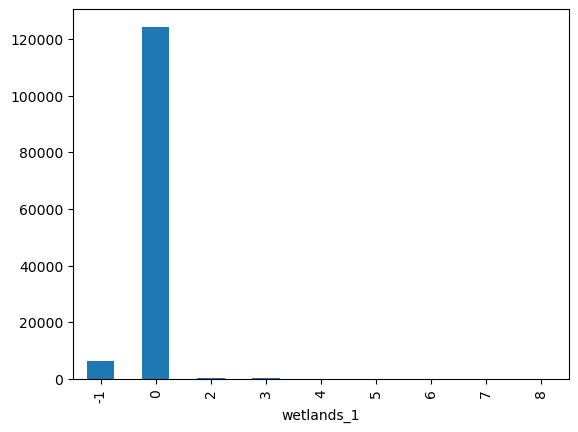

In [42]:
subset['wetlands_1'].value_counts()[subset['wetlands_1'].unique()].sort_index().plot.bar(y='wetlands_1')

#### 4g. Check if there are any NaN values in the data

In [36]:
subset.isnull().sum()

landsat_1        0
landsat_2        0
landsat_3        0
landsat_4        0
landsat_5        0
landsat_6        0
dem_1            0
aspect_1         0
posidex_1        0
wetlands_1       0
landcover_1      0
impervious_1     0
urban_count_7    0
urban_count_5    0
urban_count_3    0
xgeo             0
ygeo             0
dtype: int64

#### 4h. Replace all NaN or invalid values in the 3 columns (dem_1, aspect_1, wetlands_1)

>__Think__: Take a look at the bar plots above, how would you go about replacing the invalid values for each feature? Would you handle them differently? How should we treat continuous variables differently than categorical?

>__Note__: Invalid categorical data can be replaced with "most prevalent" or you can create a new subcategory to represent it as "missing"

>__Note__: Invalid continuous or numerical data can be replaced with the median, or the mean, or 0 depending on the situation

For the sake of the assignment replace dem_1 with its mean, create a new variable for aspect_1 current values or (0-17) replace all invalid with 18, replace wetlands_1 with 0 since it is by far the most prevalent value

In [ ]:
subset['dem_1'] = subset['dem_1'].replace(-9999, subset['dem_1'].mean())
subset['aspect_1'] = subset['aspect_1'].replace(255, 18)
subset['wetlands_1'] = subset['wetlands_1'].replace(-1, 0)

## 5. One-Hot Encoding

>  In One-Hot encoding, additional features are created based on the number of unique values in a categorical feature. Every unique value in the category is added as a new feature variable

#### 5a. Perform One-Hot encoding on the column 'aspect_1'

> __HINT__: You can find the code in the assignment instructions

In [ ]:
def one_hot_encode(dataframe, column):
    vectorizer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    vectorizer.fit_transform(dataframe[[column]].values)

    #assigning the value obtained above to a new variable
    one_hot_array = vectorizer.fit_transform(dataframe[[column]].values)

    #obtaining the column names
    column_names = [f'{column}_{cat}' for cat in vectorizer.categories_[0]]
    
    #converting it to a dataframe
    one_hot_data = pd.DataFrame(one_hot_array, columns=column_names)

    #concatting this new dataframe to the existing dataframe
    dataframe = pd.concat([dataframe, one_hot_data], axis = 1)

    dataframe = dataframe.drop([column], axis = 1)
    
    return dataframe




In [ ]:
subset = one_hot_encode(subset, "aspect_1")
subset

#### 5b. Perform One-Hot encoding on the column 'wetlands_1'

> __HINT__: You can find the code in the assignment instructions

In [ ]:
subset = one_hot_encode(subset, 'wetlands_1')
subset

## 6. Analyze the Target Variable Distribution

#### 6a. Plot a barplot of "impervious_1" to check frequency of values in the variable

> __HINT__: You can check the assignment instructions for the code

In [ ]:
subset['impervious_1'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='impervious_1', figsize=(15,4), fontsize=9)

## 7. Univarite Analysis

> Before performing multivariate regression, it is a good idea to carry out univariate analysis to find the relationships between the target and feature variables individually 

#### 7a. Print the correlations of target variable "impervious_1" with other numerical feature variables
> __HINT__: The code can be found in the assignment instruction file

In [ ]:
numerical_features = [
    'landsat_1', 'landsat_2', 'landsat_3', 'landsat_4', 'landsat_5', 'landsat_6', 
    'urban_count_3', 'urban_count_5', 'urban_count_7', 'dem_1']
corrs = [(col, subset['impervious_1'].corr(subset[col])) for col in numerical_features]
correlations = pd.DataFrame(corrs, columns=['feature','corr']).sort_values('corr', ascending=False)
correlations


## 10. Define Processing Function
>__HINT__: create a python function take takes as input the path to your csv and returns a preprocessed dataframe following all the PROCESSING steps you completed in this assignment

In [ ]:
def preprocess(path):
    # read csv
    df = pd.read_csv(path)
    # subset dataframe
    subset = subset.loc[((df['impervious_1']> 1) & (df['impervious_1'] <= 100))]
    # drop invalid observations
    subset = subset.loc[(
        (subset['landsat_1'] != 0) &
        (subset['landsat_2'] != 0) &
        (subset['landsat_3'] != 0) &
        (subset['landsat_4'] != 0) &
        (subset['landsat_5'] != 0) &
        (subset['landsat_6'] != 0))]
    subset = subset.reset_index()
    # fill invalid values
    subset['dem_1'] = subset['dem_1'].replace(-9999, subset['dem_1'].mean())
    subset['aspect_1'] = subset['aspect_1'].replace(255, 18)
    subset['wetlands_1'] = subset['wetlands_1'].replace(-1, 0)
    subset = one_hot_encode(subset, "aspect_1")
    subset = one_hot_encode(subset, "wetlands_1")
    return subset